This version use entropy/information of each word in allowed guesses to rank and choose which will be guess in next step <br />
Entropy shows the expected information given by each word, is used to reduce the uncertainty of possible answer then easily minimum the score (number of tries) which is less than 6 <br />


#### Algorithm
list=allowed_lst <br />
while feedback != all 2's <br />
choose Max entropy from list<br />
list= feedback + guess <br />

entropy= E(I)=sum(p.I)=sum(p.log2(1/p)) <br />
Compute p of each pattern which this word may have <br />
p=pattern made by remain possible answers match with guess / list <br />

save best choice at each guess with each pattern <br />



In [2]:
with open('allowed_guesses.txt','r') as file:
    allowed_guesses=[]
    for i in file:
        allowed_guesses.append(i[:5])
import random
import time
from math import *

In [40]:
def get_feedback(guess:str,answer:str) -> list: 
    """
    get_feeback
    ----------
    guess: Five-letter guess.
    answer: Five-letter correct answer.
    Returns: Feedback contains 05 elements, which can be 0, 1, or 2, denoting a feedback pattern
    """
    # convert string to list
    answer = list(answer)
    guess = list(guess)
    
    #initialize
    feedback = ['']*5
    
    # isolate correctly placed letters
    for i in range(5):
        if guess[i] == answer[i]:
            feedback[i] = 2
            answer[i] = ''
            guess[i] = ''

    for i in range(5):
        if guess[i] == '': continue
        # try:
        #     index=answer.index(guess[i])
        #     feedback[i] = 1
        #     answer[index] = ''
        #     guess[i] = ''
        # except:
        #     feedback[i]=0
        elif guess[i] in answer:
            feedback[i] = 1
            answer[answer.index(guess[i])] = ''
            guess[i] = ''
        else:
            feedback[i] = 0
    return feedback

get_feedback('speed','crepe')

[0, 1, 2, 1, 0]

In [41]:
def reduce_list(guess:str,feedback:list,possible_answers:list) ->list:
    '''This function return the reduced allowed word list - possible answers list which have real answer
    
    guess: the word we guessed in this step
    feedback: the pattern given by game
    word_list: allowed list in the first step and the reduced list in the next steps
    '''
    return [word for word in possible_answers if get_feedback(guess,word)==feedback]
len(reduce_list('slate',[1,0,1,2,0],allowed_guesses))



74

In [42]:
def convert_ternary(t):
    """
    Parameters
    ----------
    t : list
        Contains 05 elements, which can be 0, 1, or 2, denoting a feedback pattern.
    Returns
    -------
    int
        Base 10 representation of pattern.
    """
    return sum([t[i]*3**(4-i) for i in range(5)])
convert_ternary([1,2,0,0,2])

137

In [66]:
def entropy(guess:str, possible_answers:list):
    '''Function compute the entropy of each word which could be chosen in hard mode \n
    Return value of entropy(bits)
    Detail: It computes expected value of probability distribution of possible patterns, based on possible answer(reduced list) or allowed list at initial \n
    pattern=guess + word in possible answers \n
    p= number of specific pattern / total patterns of word_list'''
    Entropy=0
    total = len(possible_answers)
    PD_patterns = dict() #probability distribution of patterns
    for word in possible_answers:
        feedback = get_feedback(guess,word)
        fb=convert_ternary(feedback)
        PD_patterns[fb] = PD_patterns.get(fb,0) + 1/total
    for prob in PD_patterns.values():
        Entropy+=-prob*log2(prob)
    # print(PD_patterns)
    return Entropy  
entropy('slain',allowed_guesses)


5.510293761069228

In [70]:
def entropy_dict(possible_answers):
    # pair=(possible_answers[0],entropy(possible_answers[0],possible_answers))
    # ranker = [pair]
    ranker=[]
    for guess in possible_answers:
        ranker.append((guess,entropy(guess,possible_answers)))
    ranker.sort(key = lambda t: t[1], reverse = True)
    return ranker
    # for guess in possible_answers:
    #     new_pair=(guess,entropy(guess,possible_answers))
    #     change=0
    #     for i,pair in enumerate(ranker):
    #         if new_pair[1]>=pair[1]:
    #             ranker=ranker[:i]+[new_pair]+ranker[i:]
    #             change=1
    #             break
    #     if change==0:
    #         ranker+=[new_pair]
    #     print(new_pair)
    return ranker
# print([(word,entropy(word,allowed_guesses[:100])) for word in allowed_guesses[:100]])
# print(allowed_guesses[:100])
entropy_dict(allowed_guesses[:5000])

Traceback (most recent call last):
  File "/Users/nguyenbathiem/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 987, in trace_dispatch
    self.do_wait_suspend(thread, frame, event, arg)
  File "/Users/nguyenbathiem/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 164, in do_wait_suspend
    self._args[0].do_wait_suspend(*args, **kwargs)
  File "/Users/nguyenbathiem/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2062, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/nguyenbathiem/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2098, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

[('tares', 6.195594730245377),
 ('lares', 6.151313589324651),
 ('rales', 6.115942447723608),
 ('rates', 6.097615309189668),
 ('teras', 6.078258349905183),
 ('nares', 6.068444540347897),
 ('soare', 6.062302776061357),
 ('tales', 6.0563053370969895),
 ('reais', 6.051229434211681),
 ('tears', 6.033781875729947),
 ('arles', 6.031334630198202),
 ('tores', 6.019304195305773),
 ('salet', 6.017847926120458),
 ('aeros', 6.0140608641637145),
 ('dares', 6.011187647555291),
 ('reals', 6.000797839298542),
 ('saner', 6.000576805791645),
 ('lears', 5.990079707202211),
 ('lores', 5.977642150779597),
 ('serai', 5.974867726286669),
 ('lanes', 5.972511722164216),
 ('laers', 5.9702900415510864),
 ('pares', 5.968213362998895),
 ('cares', 5.96714476106444),
 ('tires', 5.964383595082227),
...
 ('morts', 5.392590605517464),
 ('leres', 5.392100150679694),
 ('peart', 5.392010978047047),
 ('lunas', 5.391224654535519),
 ...]

In [7]:
def solution_inputted_feedback():
    word_list=allowed_guesses # word_lst may be allowed or possible depend on thinking
    feedback=[0,0,0,0,0]
    guess='tares'
    while True:
        print(guess)
        feedback=[int(i) for i in str(input())] #string
        if feedback==[2]*5:
            break
        word_list=reduce_list(guess,feedback,word_list)
        guess=entropy_dict(word_list)[0][0]

solution_inputted_feedback()

tares


In [11]:
def solution_for_test(answer):
    word_list=allowed_guesses
    k=0
    guess='tares'
    while True:
        k+=1
        # print(guess)
        feedback=get_feedback(guess,answer)
        if feedback==[2]*5:
            break
        word_list=reduce_list(guess,feedback,word_list)
        guess=entropy_dict(word_list)[0][0]
    return k

In [12]:
with open("real_possible_answers.txt","r") as file:
        real_possible_answers=[]
        for i in file:
            real_possible_answers.append(i[:5])
xMax=20 # may be posituve infinity number
yMax=0
lst=[0]*xMax
for word in real_possible_answers[:10]:
        # if not RANDOM:
        #     answer=word
        # elif RANDOM:
        #     answer=random.choice(real_possible_answers)
        answer=word
        NumberOfGuessesNeeded=solution_for_test(answer) 
        lst[NumberOfGuessesNeeded]=lst[NumberOfGuessesNeeded]+1
N=len(real_possible_answers)
winrate=sum(lst[1:7])/10*100
average=sum([i*lst[i] for i in range(1,xMax)]) / 10
print(winrate,average)

100.0 3.9


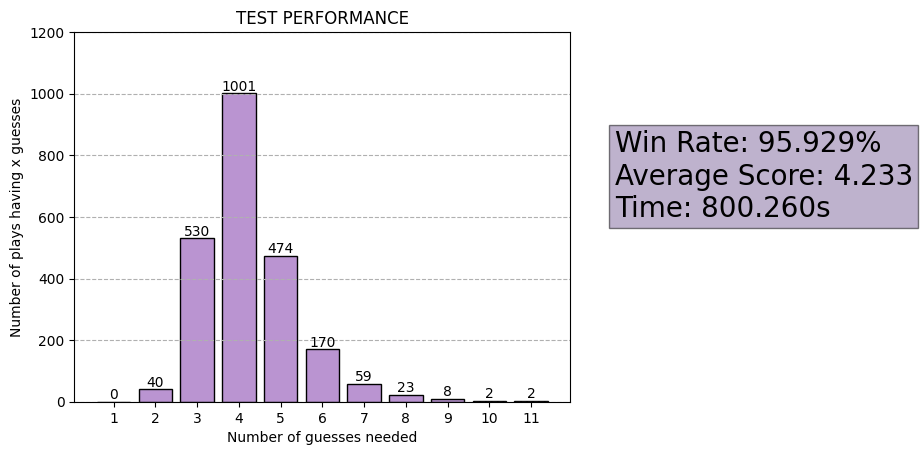

(95.92897358163707, 4.233434387180598)

In [13]:
def TestModel(RANDOM=False):
    '''This function give the bar chart with x(number of guesses needed) \n
    and y(number of plays having x guesses)'''
    import time
    t1=time.time()
    with open("real_possible_answers.txt","r") as file:
        real_possible_answers=[]
        for i in file:
            real_possible_answers.append(i[:5])
    
    #Compute some vital factor: number of plays having x guesses, win rate, average score of 2,3k plays   
    xMax=20 # may be posituve infinity number
    yMax=0
    lst=[0]*xMax
    N=len(real_possible_answers)# list contains number of plays having x guesses
    
    for word in real_possible_answers:
        if not RANDOM:
            answer=word
        elif RANDOM:
            answer=random.choice(real_possible_answers)
        NumberOfGuessesNeeded=solution_for_test(answer) 
        lst[NumberOfGuessesNeeded]=lst[NumberOfGuessesNeeded]+1
    winrate=sum(lst[1:7])/N*100
    average=sum([i*lst[i] for i in range(1,xMax)]) / N

        
    #VISUALIZATION
    import matplotlib.pyplot as plt
    for i in range(1,xMax):
        if lst[i] >=yMax: # because yMax always in (1,6)
            yMax=lst[i]
        if lst[i]==0 and i>6:
            xMax=i
            break
    yMax=(yMax//100+2)*100
    x=[str(i) for i in range(1,xMax)]
    y=[i for i in lst[1:xMax]]
    plt.ylim(0,yMax)
    plt.grid(axis='y',linestyle='--')
    plt.xlabel('Number of guesses needed')
    plt.ylabel('Number of plays having x guesses')
    plt.title('TEST PERFORMANCE')
    plt.bar(x,y, fc="#BA94D1", ec="black")
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha="center", va="bottom")
    t2=time.time()
    time=t2-t1
    plt.text(xMax,yMax/2, f'Win Rate: {winrate:.3f}%\nAverage Score: {average:.3f}\nTime: {time:.3f}s', fontsize = 20,
		bbox = dict(facecolor = '#7F669D', alpha = 0.5))
    plt.show()
    return winrate,average
#fix bug visualization, x,y...
TestModel()
        


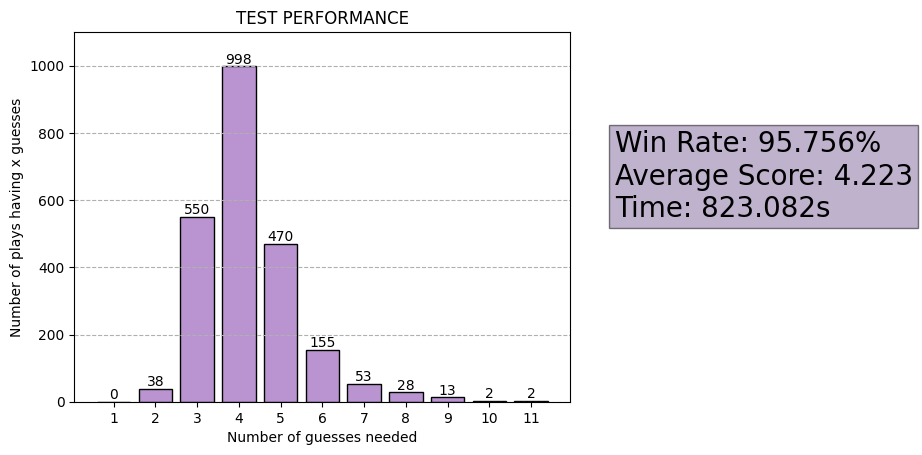

(95.75573841489823, 4.223473365093114)

In [14]:
def TestModel(RANDOM=False):
    '''This function give the bar chart with x(number of guesses needed) \n
    and y(number of plays having x guesses)'''
    import time
    t1=time.time()
    with open("real_possible_answers.txt","r") as file:
        real_possible_answers=[]
        for i in file:
            real_possible_answers.append(i[:5])
    
    #Compute some vital factor: number of plays having x guesses, win rate, average score of 2,3k plays   
    xMax=20 # may be posituve infinity number
    yMax=0
    lst=[0]*xMax
    N=len(real_possible_answers)# list contains number of plays having x guesses
    
    for word in real_possible_answers:
        if not RANDOM:
            answer=word
        elif RANDOM:
            answer=random.choice(real_possible_answers)
        NumberOfGuessesNeeded=solution_for_test(answer) 
        lst[NumberOfGuessesNeeded]=lst[NumberOfGuessesNeeded]+1
    winrate=sum(lst[1:7])/N*100
    average=sum([i*lst[i] for i in range(1,xMax)]) / N

        
    #VISUALIZATION
    import matplotlib.pyplot as plt
    for i in range(1,xMax):
        if lst[i] >=yMax: # because yMax always in (1,6)
            yMax=lst[i]
        if lst[i]==0 and i>6:
            xMax=i
            break
    yMax=(yMax//100+2)*100
    x=[str(i) for i in range(1,xMax)]
    y=[i for i in lst[1:xMax]]
    plt.ylim(0,yMax)
    plt.grid(axis='y',linestyle='--')
    plt.xlabel('Number of guesses needed')
    plt.ylabel('Number of plays having x guesses')
    plt.title('TEST PERFORMANCE')
    plt.bar(x,y, fc="#BA94D1", ec="black")
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha="center", va="bottom")
    t2=time.time()
    time=t2-t1
    plt.text(xMax,yMax/2, f'Win Rate: {winrate:.3f}%\nAverage Score: {average:.3f}\nTime: {time:.3f}s', fontsize = 20,
		bbox = dict(facecolor = '#7F669D', alpha = 0.5))
    plt.show()
    return winrate,average
#fix bug visualization, x,y...
TestModel(True)
        
